In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


# 1D Model with an infinite halfspace


In [2]:
from geobipy import StatArray
from geobipy import Model1D
from geobipy import Distribution
from geobipy import FdemData
import matplotlib.pyplot as plt
import numpy as np
import h5py
from geobipy import hdfRead

## Instantiate the 1D Model with a Half Space



(150.0, 0.0)

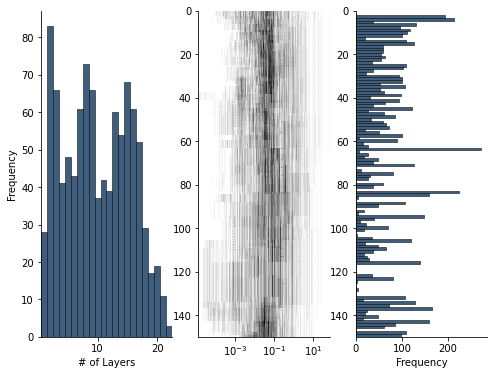

In [66]:
from copy import deepcopy
from geobipy import StatArray
from geobipy import Model1D
from geobipy import Distribution
from geobipy import FdemData
import matplotlib.pyplot as plt
import numpy as np
import h5py
from geobipy import hdfRead

# %%
# Instantiate the 1D Model with a Half Space
# ++++++++++++++++++++++++++++++++++++++++++

# Make a test model with 10 layers, and increasing parameter values
nLayers = 10
par = StatArray(np.linspace(0.001, 0.02, nLayers),
                "Conductivity", "$\\frac{S}{m}$")
thk = StatArray(np.full(nLayers, fill_value=10.0))
thk[-1] = np.inf
mod = Model1D(parameters=par, thickness=thk)

prng = np.random.RandomState(0)
# Set the priors
mod.setPriors(halfSpaceValue=0.01,
              min_edge=1.0,
              max_edge=150.0,
              max_cells=30,
              parameterPrior=True,
              gradientPrior=True,
              prng=prng)

pProposal = Distribution('LogNormal', 0.01, np.log(2.0)**2.0,
                         linearSpace=True, prng=prng)
mod.setProposals(probabilities=[0.25, 0.25, 0.25, 0.25],
                 parameterProposal=pProposal, prng=prng)

mod.setPosteriors()

for i in range(1000):
    remapped, perturbed = mod.perturb()

    # And update the model posteriors
    perturbed.updatePosteriors()

    mod = perturbed

mod.updatePosteriors()

fig = plt.figure(figsize=(8, 6))
plt.subplot(131)
mod.nCells.posterior.plot()
ax = plt.subplot(132)
mod.par.posterior.pcolor(cmap='gray_r', xscale='log',
                         noColorbar=True, flipY=False)
plt.subplot(133, sharey=ax)
mod.depth.posterior.plot(rotate=True, flipY=True)

plt.ylim([150, 0])

In [50]:
mod.par

StatArray([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
           0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])

In [51]:
mod.depth

StatArray([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90., inf])

In [52]:
mod.interpPar2Mesh(mod.par.posterior, axis=1)

array([0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.001     , 0.001     , 0.001     , 0.00311111, 0.00311111,
       0.00311111, 0.00311111, 0.00311111, 0.00311111, 0.00311111,
       0.00311111, 0.00522222, 0.00522222, 0.00522222, 0.00522222,
       0.00522222, 0.00522222, 0.00522222, 0.00522222, 0.00733333,
       0.00733333, 0.00733333, 0.00733333, 0.00733333, 0.00733333,
       0.00733333, 0.00733333, 0.00944444, 0.00944444, 0.00944444,
       0.00944444, 0.00944444, 0.00944444, 0.00944444, 0.00944444,
       0.01155556, 0.01155556, 0.01155556, 0.01155556, 0.01155556,
       0.01155556, 0.01155556, 0.01155556, 0.01366667, 0.01366667,
       0.01366667, 0.01366667, 0.01366667, 0.01366667, 0.01366667,
       0.01366667, 0.01577778, 0.01577778, 0.01577778, 0.01577778,
       0.01577778, 0.01577778, 0.01577778, 0.01577778, 0.01788889,
       0.01788889, 0.01788889, 0.01788889, 0.01788889, 0.01788889,
       0.01788889, 0.01788889, 0.02      , 0.02      , 0.02   

In [47]:
mod.par.posterior.y.edges

StatArray([  0.27916667,   1.52083333,   2.7625    ,   4.00416667,
             5.24583333,   6.4875    ,   7.72916667,   8.97083333,
            10.2125    ,  11.45416667,  12.69583333,  13.9375    ,
            15.17916667,  16.42083333,  17.6625    ,  18.90416667,
            20.14583333,  21.3875    ,  22.62916667,  23.87083333,
            25.1125    ,  26.35416667,  27.59583333,  28.8375    ,
            30.07916667,  31.32083333,  32.5625    ,  33.80416667,
            35.04583333,  36.2875    ,  37.52916667,  38.77083333,
            40.0125    ,  41.25416667,  42.49583333,  43.7375    ,
            44.97916667,  46.22083333,  47.4625    ,  48.70416667,
            49.94583333,  51.1875    ,  52.42916667,  53.67083333,
            54.9125    ,  56.15416667,  57.39583333,  58.6375    ,
            59.87916667,  61.12083333,  62.3625    ,  63.60416667,
            64.84583333,  66.0875    ,  67.32916667,  68.57083333,
            69.8125    ,  71.05416667,  72.29583333,  73.5375 

In [21]:
mod.par

StatArray([0.001])

## Randomness and Model Perturbations
We can set the priors on the 1D model by assigning minimum and maximum layer
depths and a maximum number of layers.  These are used to create priors on
the number of cells in the model, a new depth interface, new parameter values
and the vertical gradient of those parameters.
The halfSpaceValue is used as a reference value for the parameter prior.



In [ ]:
prng = np.random.RandomState()
# Set the priors
mod.setPriors(halfSpaceValue = 0.01,
              minDepth = 1.0, 
              maxDepth = 150.0, 
              maxLayers = 30, 
              parameterPrior = True, 
              gradientPrior = True, 
              prng = prng)

To propose new models, we specify the probabilities of creating, removing, perturbing, and not changing
a layer interface



In [ ]:
pProposal = Distribution('LogNormal', 0.01, np.log(2.0)**2.0, linearSpace=True, prng=prng)
mod.setProposals(probabilities = [0.25, 0.25, 0.25, 0.25], parameterProposal=pProposal, prng=prng)

We can then perturb the layers of the model
perturbed = mod.perturbStructure()



In [ ]:
remapped, perturbed = mod.perturb()

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(121)
mod.pcolor(grid=True)
ax = plt.subplot(122)
perturbed.pcolor(grid=True)

We can evaluate the prior of the model using depths only



In [ ]:
print('Log probability of the Model given its priors: ', mod.priorProbability(False, False, log=True))
# Or with priors on its parameters, and parameter gradient with depth.
print('Log probability of the Model given its priors: ', mod.priorProbability(True, True, log=True))

## Perturbing a model multiple times
In the stochasitic inference process, we perturb the model structure, 
and parameter values, multiple times. 
Each time the model is perturbed, we can record its state
in a posterior distribution.

For a 1D model, the parameter posterior is a 2D hitmap with depth in one dimension
and the parameter value in the other.
We also attach a 1D histogram for the number of layers,
and a 1D histogram for the locations of interfaces.

Since we have already set the priors on the Model, we can set the posteriors
based on bins from from the priors.



In [ ]:
mod.setPosteriors()

mod0 = mod.deepcopy()

Now we randomly perturb the model, and update its posteriors.



In [ ]:
mod.updatePosteriors()
for i in range(1000):
    remapped, perturbed = mod.perturb()

    # And update the model posteriors
    perturbed.updatePosteriors()

    mod = perturbed

We can now plot the posteriors of the model.

Remember in this case, we are simply perturbing the model structure and parameter values
The proposal for the parameter values is fixed and centred around a single value.



In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(131)
mod.nCells.posterior.plot()
ax = plt.subplot(132)
mod.par.posterior.pcolor(cmap='gray_r', xscale='log', noColorbar=True, flipY=True)
plt.subplot(133, sharey=ax)
mod.depth.posterior.plot(rotate=True, flipY=True);